An analysis of a simple dataset. The only objective in this project is to create a very simple linear regression module. Nothing more

In [3]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Set the dataframe and know the aspect of the dataset

In [4]:
df = pd.read_csv('Future50.csv')
df.head(4)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes


In [5]:
indexSize = len(df.index)
X = np.arange(indexSize)
print(X)

Y = np.array(df['Sales'])
print(Y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[24 44 21 25 49 39 24 20 24 29 30 39 41 48 21 24 44 37 22 39 32 44 23 47
 37 39 44 28 28 27 20 42 42 27 22 22 40 20 38 29 49 47 28 25 38 48 45 39
 31 44]


Gain a better understanding of the data

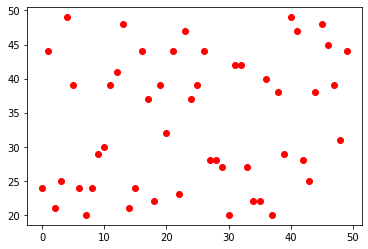

In [6]:
plt.plot(X, Y, 'ro', label='Original data')
plt.show()

After this, we can conclude that, the collums in which we will apply the linear regression are suited for the model we want to use

In [5]:
#The code this line below wasn´t used
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

rng = np.random

# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)



In [6]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [7]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

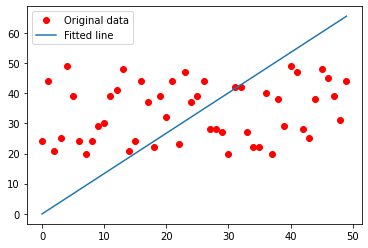

In [8]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()